# Task 4.10: Coding Etiquette & Excel Reporting

# Section A


# Step 1: Importing Libraries

In [3]:
#Importing Libraries;

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Step 2: Importing Dataset

In [4]:
#Creating a Folderpath; 

path = '/users/ibu/Documents/12-2022 Instacart Basket Analysis'

In [5]:
#Importing Most Updated'Customers Dataset' from 'Prepared Data' Folder;

df_Customer_Orders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Cust_Ords_Prods_T49A.pkl'))

In [6]:
#Verying Dataset Columns; 

df_Customer_Orders.shape

(32404859, 35)

In [7]:
crosstab = pd.crosstab(df_Customer_Orders['days_since_prior_order'], df_Customer_Orders['order_number'], dropna = False)

In [8]:
crosstab.to_clipboard()

# Step 3: PII Data Security


Three ways to address any personal identifiable data concerns; 

<b>1. Removing (Deleting) all Columns with Names

    
<b>2. Filtering all Columns containing Customer's Names

    
<b>3. Leave them on,but make note on your reporting to Stakeholders or Department's Heads
    

# Step 4: Creating Regional Data Segmentation via a 'Region_Flag'

<b> (A). The Instacart Officers are interested in comparing customer behavior in different geographic areas

In [9]:
# Checking frequency for U.S States;

df_Customer_Orders['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
df_Customer_Orders.shape

(32404859, 35)

In [11]:
#Creating 'Northeast' Regions List; 

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [12]:
#Creating 'Midwest' Regions List; 

Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [13]:
#Creating 'South' Regions List; 

South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [14]:
#Creating 'West' Regions List; 

West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [15]:
#Creating Loop-Logic for the U.S Regions List; 

result = []

for value in df_Customer_Orders ["state"]:
    if value in Northeast:
        result.append ("Northeast")
    elif value in Midwest:
        result.append ("Midwest")
    elif value in South:
        result.append ("South")
    else:
        result.append ("West")
    

In [16]:
df_Customer_Orders ["regions"] = result

In [17]:
# Checking Frequency for U.S Regions; 

df_Customer_Orders['regions'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: regions, dtype: int64

In [22]:
#Checking of Dataset Column-Headers;

df_Customer_Orders.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'prices_range_loc', 'Busiest day', 'Busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'Average_Prices',
       'spender_flag', 'median_days-since_prior_order', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'total_dependents', 'marital_status', 'income', 'regions'],
      dtype='object')

In [18]:
df_Customer_Orders.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,total_dependents,marital_status,income,regions
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,473747,1,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,431534,1,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


# Step 4.b: 


<b>Determining any existing spending habits difference across the different U.S. regions.</b> 
    
<b>Hint:</b> You can do this by crossing the variable you just created with the spending flag.)

In [19]:
#Analyzing Customer's Spending Habits across U.S Regions;

Spend_Habits = pd.crosstab(df_Customer_Orders['regions'], df_Customer_Orders['spender_flag'], dropna = False)

In [20]:
Spend_Habits

spender_flag,High Spenders,Low Spenders
regions,,
Midwest,7589534,7791
Northeast,5717129,5607
South,10781873,10012
West,8284433,8480


In [21]:
#Copying 'Spend-Habits' to clipboard;

Spend_Habits.to_clipboard()

# Step 5: Creating 'Exclusion-Flag' for Low-Activity Customers


<b>(A). The Instacart CFO isn't interested in customers who don't generate much revenue for the app. 
    
An exclusion-flag for low-activity customers with less than 5 orders need to be created to exclude them from data. 

In [22]:
#Creating 'Exclusion_Flag' on Customers basing on Maximum Orders 'max_order'; 

df_Customer_Orders.loc[df_Customer_Orders['max_order'] >= 5, 'Activity_Flag'] = 'High Activity'
df_Customer_Orders.loc[df_Customer_Orders['max_order'] < 5, 'Activity_Flag'] = 'Low Activity'

In [23]:
#Checking Columns-Value Counts for the ;

df_Customer_Orders ['Activity_Flag'].value_counts()

High Activity    30964564
Low Activity      1440295
Name: Activity_Flag, dtype: int64

In [24]:
#Creating Dataframe to Filter 'Low Activity' Customers; 

df_Low_Actv_Cust = df_Customer_Orders[df_Customer_Orders ['Activity_Flag'] == 'Low Activity']

In [30]:
#Checking for Results; 

df_Low_Actv_Cust.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,total_dependents,marital_status,income,regions,Activity_Flag
1510,1744,520620,120,1,3,11,NaN,196,2,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1511,1746,3273029,120,3,2,8,19.0,196,2,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1512,1744,520620,120,1,3,11,NaN,46149,1,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1513,1746,3273029,120,3,2,8,19.0,46149,1,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1514,1744,520620,120,1,3,11,NaN,26348,3,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity


In [31]:
#Exporting 'Low Activity' Customer Dataset; 

df_Low_Actv_Cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low_Activity_Customers.pkl'))

In [26]:
#Creating Dataframe to Filter 'High Activity' Customers; 

df_High_Actv_Cust = df_Customer_Orders[df_Customer_Orders ['Activity_Flag'] == 'High Activity']

In [27]:
#Checking for Results; 

df_High_Actv_Cust.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,total_dependents,marital_status,income,regions,Activity_Flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
2,2,473747,1,3,3,12,21.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
4,4,431534,1,5,4,15,28.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity


In [28]:
#Exporting 'High Activity' Customer Dataset; 

df_High_Actv_Cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_Activity_Customers.pkl'))

# Step 6: Customer Profiling

<b>A. Customer's Family Status

In [36]:
df_High_Actv_Cust.loc[(df_High_Actv_Cust['department_id']==18) & (df_High_Actv_Cust['total_dependents']>0), 'marital_status'] = 'Young Childrens Family'

In [37]:
df_High_Actv_Cust.loc[(df_High_Actv_Cust['department_id']!=18) & (df_High_Actv_Cust['total_dependents']>0), 'marital_status'] = 'Older Childrens Family'

In [38]:
df_High_Actv_Cust.loc[(df_High_Actv_Cust['total_dependents']==0) & (df_High_Actv_Cust['total_dependents']>0), 'marital_status'] = 'No Childrens Family'

In [39]:
df_Customer_Orders ['marital_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [54]:
#Copying 'Ages_Region' to clipboard;

df_Customer_Orders ['marital_status'].to_clipboard()

# Step 6: Customer Profiling

<b>B. Age Categories

In [31]:
df_High_Actv_Cust['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Based upon the exploratory results, we can see that; 

<b>Minimum age = 18 years

<b>Maximum Age = 81 Years
    
    
Hence, we can conclude that; 
    
<b>Ages 18 - 34 = Youths
    
<b>Ages 35 - 64 = Adults
    
<b>Ages 65 onwards = Seniors

        

In [45]:
df_Customer_Orders.loc[df_Customer_Orders['age'] <35, 'age_category'] = 'Young Adults'

In [46]:
df_Customer_Orders.loc[(df_Customer_Orders['age']>=35) & (df_Customer_Orders['age']<65), 'age_category'] = 'Adults'

In [47]:
df_Customer_Orders.loc[df_Customer_Orders['age']>65, 'age_category'] = 'Seniors'

In [48]:
#Crosstab(ing)'age_category' column by the 'Regions' column;

Ages_Region = pd.crosstab(df_Customer_Orders['age_category'], df_Customer_Orders['regions'])

In [49]:
#Printing of the Ages by Region; 

Ages_Region

regions,Midwest,Northeast,South,West
age_category,,,,
Adults,3603909,2633291,5057303,3907617
Seniors,1881637,1458952,2669420,2078092
Young Adults,2002572,1535542,2898325,2191216


In [50]:
#Cheking Customers Ages by 'Age Category'; 

df_Customer_Orders ['age_category'].value_counts()

Adults          15202120
Young Adults     8627655
Seniors          8088101
Name: age_category, dtype: int64

In [55]:
#Copying 'Ages_Region' to clipboard;

Ages_Region.to_clipboard()

In [57]:
#Aggregating Age Category Usage Frequency; 

df_Customer_Orders.groupby('age_category').agg({'median_days-since_prior_order':['mean', 'min','max']})

median_days-since_prior_order           
                                      mean  min   max
age_category                                         
Adults                           10.412112  0.0  30.0
Seniors                          10.364986  0.0  30.0
Young Adults                     10.407518  0.0  30.0

In [58]:
#Aggregating Age Category Expenditure;

df_Customer_Orders.groupby('age_category').agg({'prices':['mean', 'min','max']})

prices              
                   mean  min      max
age_category                         
Adults        11.989499  1.0  99999.0
Seniors       11.838480  1.0  99999.0
Young Adults  12.173973  1.0  99999.0

# Step 6: Customer Profiling

<b>C. Income Profiling

In [59]:
#Checking Customer's Income Stats;

df_High_Actv_Cust['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

<b>Setting Customer's Income Criteria;

    
1. Customers earning less than 200,000 = Low Earners

    
2. Customers earning between 200,000 - 400,000 = Middle Earners
  
    
3. Customers earning above 400,000 = High Earners


In [63]:
#Creating Income Earning Criteria; 

df_High_Actv_Cust.loc[df_High_Actv_Cust['income']<200000, 'income_group'] = 'Low Earners'

In [67]:
df_High_Actv_Cust.loc[(df_High_Actv_Cust['income']>200000) & (df_High_Actv_Cust['income'] <=400000), 'income_group'] = 'Mid-Earners'

In [61]:
df_High_Actv_Cust.loc[df_High_Actv_Cust['income']>400000, 'income_group'] = 'High Earners'

In [68]:
df_High_Actv_Cust['income_group'].value_counts (dropna = False)

Low Earners     30710422
Mid-Earners       207146
High Earners       46996
Name: income_group, dtype: int64

In [73]:
#Copying 'Income_Group' to clipboard;

df_High_Actv_Cust['income_group'].to_clipboard()

In [72]:
#Income Group Usage Frequency Aggregation;

df_High_Actv_Cust.groupby('income_group').agg({'median_days-since_prior_order':['mean', 'min','max']})

median_days-since_prior_order           
                                      mean  min   max
income_group                                         
High Earners                      9.251894  1.0  30.0
Low Earners                       9.964808  0.0  30.0
Mid-Earners                       8.980347  1.0  30.0

In [74]:
#Age Group Expenditure Aggregation; 

df_High_Actv_Cust.groupby('income_group').agg({'prices':['mean', 'min','max']})

prices              
                    mean  min      max
income_group                          
High Earners  222.992836  1.0  99999.0
Low Earners     9.924509  1.0  99999.0
Mid-Earners   261.895763  1.0  99999.0

# Step 6: Customer Profiling


<b>D. 'Department_id' Profiling

<b>E. Profiling Dependants

In [77]:
#Printing Total Depedents Statistics; 

df_High_Actv_Cust['total_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: total_dependents, dtype: float64

<b>Notes:</b> We can see the following information;


1. Families with No Children


2. Families with 1 or 2 Children


3. Families with 3 Children

In [86]:
df_High_Actv_Cust.loc[df_High_Actv_Cust['total_dependents'] <=0, 'household_size'] = 'Single Adults'

In [87]:
df_High_Actv_Cust.loc[(df_High_Actv_Cust['total_dependents']>1) & (df_High_Actv_Cust['total_dependents'] <= 2), 'household_size'] = 'Young Parent'

In [88]:
df_High_Actv_Cust.loc[(df_High_Actv_Cust['total_dependents'] >2) & (df_High_Actv_Cust['total_dependents'] <= 3), 'household_size'] = 'Big Family'

In [93]:
#Checking Household Size Frequency; 

df_High_Actv_Cust['household_size'].value_counts()

Big Family       7772516
Single Adults    7739681
Young Parent     7733261
Name: household_size, dtype: int64

In [95]:
#Copying 'Household Size' to clipboard;

df_High_Actv_Cust['household_size'].to_clipboard()

In [97]:
#Checking Household Size Frequency;

df_High_Actv_Cust.groupby('household_size').agg({'median_days-since_prior_order':['mean', 'min','max']})

median_days-since_prior_order           
                                        mean  min   max
household_size                                         
Big Family                          9.949826  0.0  30.0
Single Adults                       9.936569  0.0  30.0
Young Parent                        9.972207  0.0  30.0

In [98]:
#Checking Household Size Expenditure; 

df_High_Actv_Cust.groupby('household_size').agg({'prices':['mean', 'min','max']})

prices              
                     mean  min      max
household_size                         
Big Family      11.791609  1.0  99999.0
Single Adults   12.102657  1.0  99999.0
Young Parent    12.284472  1.0  99999.0

In [99]:
#Household Size Shopping Info by Orders Day of Week;

Household_Shopping = pd.crosstab(df_High_Actv_Cust['orders_day_of_week'], df_High_Actv_Cust['household_size'])

In [100]:
Household_Shopping

household_size,Big Family,Single Adults,Young Parent
orders_day_of_week,,,
0,1489437,1477078,1472719
1,1362820,1362350,1338837
2,1019060,1002581,1004790
3,918747,917042,921774
4,904116,905259,907389
5,1001099,1014174,1011157
6,1077237,1061197,1076595


In [101]:
#Copying 'Household Shopping' to clipboard;

Household_Shopping.to_clipboard()

In [102]:
#Household Size Shopping Info by Order Hour of Day;

Household_Hour_Shop = pd.crosstab(df_High_Actv_Cust['order_hour_of_day'], df_High_Actv_Cust['household_size'])

In [103]:
Household_Hour_Shop

household_size,Big Family,Single Adults,Young Parent
order_hour_of_day,,,
0,52225,51434,53258
1,27920,26731,27407
2,15935,16732,16105
3,12370,12375,11978
4,12692,12205,12121
5,21684,21284,19673
6,70519,70870,69213
7,215012,220071,215495
8,418005,415947,410812


In [104]:
#Copying 'Household_Hour_Shopping' to clipboard;

Household_Hour_Shop.to_clipboard()

In [105]:
#Checking Loyalty based on Household Size;

Household_Loyalty = pd.crosstab(df_High_Actv_Cust['loyalty_flag'], df_High_Actv_Cust['household_size'])

In [106]:
Household_Loyalty

household_size,Big Family,Single Adults,Young Parent
loyalty_flag,,,
Loyal Customers,2582679,2588844,2553601
New Customers,1196502,1201265,1196061
Regular Customers,3993335,3949572,3983599


In [107]:
#Copying 'Household_Loyalty' to clipboard;

Household_Loyalty.to_clipboard()

# Step 7: Visualization Charts

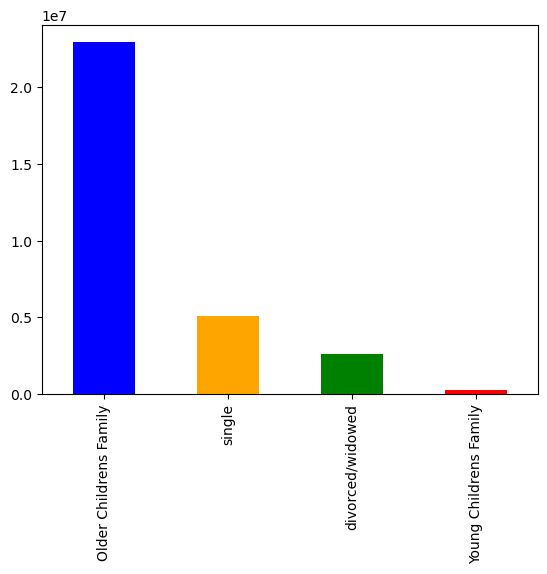

In [109]:
#Creating Bar Chart for 'Marital_Status" Column;

Bar_Marital_Status = df_High_Actv_Cust['marital_status'].value_counts().plot.bar(color=['blue','orange','green', 'red'])

In [114]:
#Exporting Bar Chart 'Marital_Status';

Bar_Marital_Status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Marital Status Bar.png'))

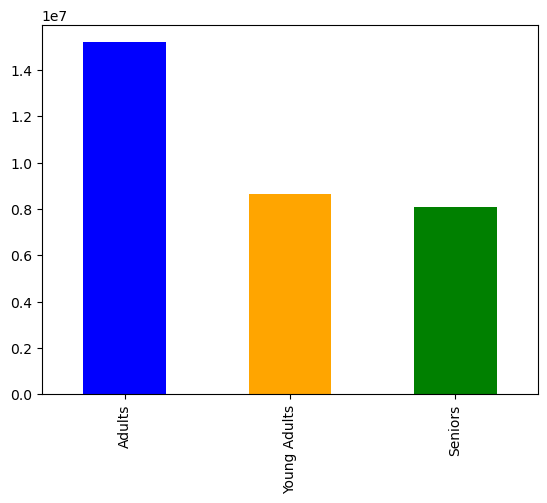

In [111]:
#Creating Bar Chart for 'Age_Category" Column;

Bar_Age_Category = df_Customer_Orders['age_category'].value_counts().plot.bar(color=['blue','orange','green'])

In [115]:
#Exporting Bar Chart 'Marital_Status';

Bar_Age_Category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Category Bar.png'))

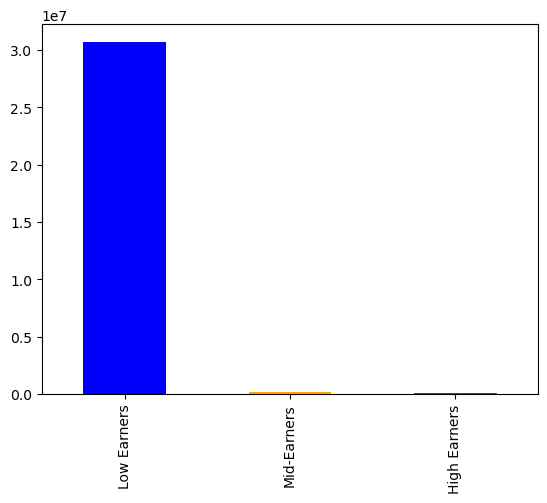

In [112]:
#Creating Bar Chart for 'Income_Group" Column;

Bar_Income_Group = df_High_Actv_Cust['income_group'].value_counts().plot.bar(color=['blue','orange','green'])

In [116]:
#Exporting Bar Chart 'Income_Group';

Bar_Income_Group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income Group Bar.png'))

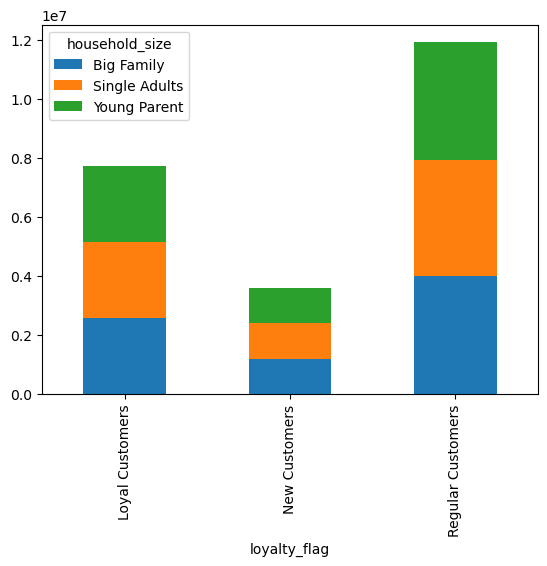

In [113]:
# Age region bar chart 

BarStak_HouseLoyalty = Household_Loyalty.plot(kind= 'bar', stacked = True)

In [117]:
#Exporting Bar Chart 'Income_Group';

BarStak_HouseLoyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Household Loyalty Bar.png'))

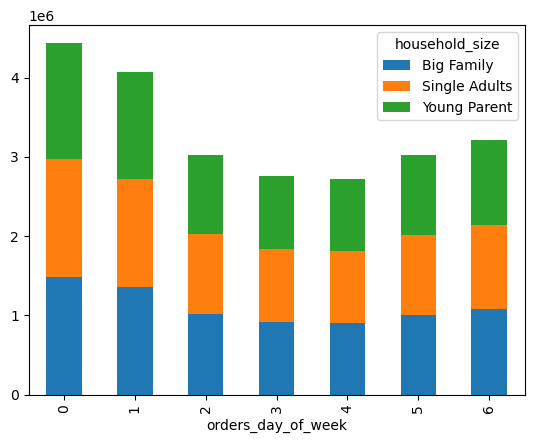

In [118]:
#Order day of the week by household size

Bar_Household_HourShop = Household_Shopping.plot(kind= 'bar', stacked = True)

In [119]:
#Exporting Bar Chart 'Income_Group';

Bar_Household_HourShop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Household Shopping Day Bar.png'))

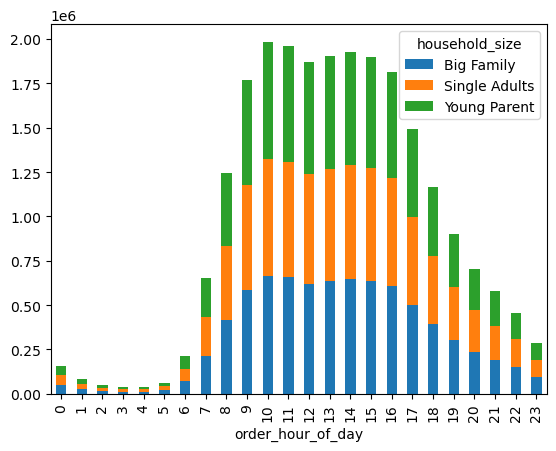

In [121]:
# Creating a Bar Chart for Household Size by 'Order Hour of Day' Column;

Bar_Household_Shop_Hour = Household_Hour_Shop.plot(kind= 'bar', stacked = True)

<b>Most orders occur between 9am and 17pm. 


In [122]:
#Exporting Bar Chart 'Household Size' Order Hour of the Day;

Bar_Household_Shop_Hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Household Shopping HourDay Bar.png'))

# Step 7: Comparing Customer Profiles with Regions and Deparments


<b>Key is to analyze behavioral patterns across regions
    
<b>A. Customer's Age by Regions

In [125]:
#Customer's Age by Regions;

Region_Cust_Age = pd.crosstab(df_Customer_Orders['age_category'], df_Customer_Orders['regions'])

In [126]:
Region_Cust_Age

regions,Midwest,Northeast,South,West
age_category,,,,
Adults,3603909,2633291,5057303,3907617
Seniors,1881637,1458952,2669420,2078092
Young Adults,2002572,1535542,2898325,2191216


In [127]:
#Copying Customer's 'Age Category' by Regions to clipboard;

Region_Cust_Age.to_clipboard()

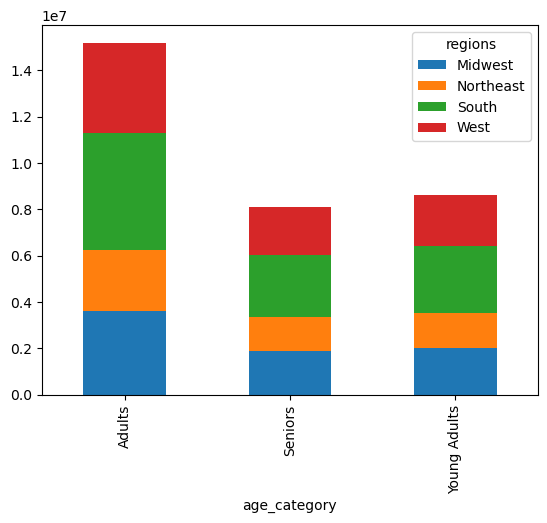

In [128]:
#Creating Bar Chart for 'Region_Cust_Age' crosstab;

Bar_Region_Cust_Age = Region_Cust_Age.plot(kind= 'bar', stacked = True)

<b>Seniors and Young Adults no much of a difference
    
<b>Adults seem to be higher across board with South Leading.

In [ ]:
#Exporting Bar Chart 'Age Category' by Regions;

Bar_Region_Cust_Age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age Category-Regions Bar.png'))


<b>B. Customer's Age Groups by Department; 



In [131]:
#Importing Departments_Wrangled dataframe; 

T_Dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [132]:
T_Dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [133]:
#Renaming Column; 'Unnamed: 0' to 'department_id'; 

T_Dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [135]:
T_Dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [137]:
#Calling for a Data Dictionary;

zipped=zip(T_Dept['department_id'], T_Dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [140]:
#Making the Connections on Department Names;

df_High_Actv_Cust['department'] = df_High_Actv_Cust['department_id'].map(data_dict)

/var/folders/4c/6cnmzmhn6k76trc3yyn2z7bm0000gn/T/ipykernel_41062/3163148132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_High_Actv_Cust['department'] = df_High_Actv_Cust['department_id'].map(data_dict)


In [141]:
#Creating Customer's Age by Department Crosstab; 

Dept_Cust_Age = pd.crosstab(df_High_Actv_Cust['department'], df_Customer_Orders['age_category'])

In [142]:
Dept_Cust_Age.head(25)

age_category,Adults,Seniors,Young Adults
department,,,
alcohol,67717,34691,40217
babies,196888,100162,107300
bakery,526110,278458,298721
beverages,1210864,646414,677017
breakfast,315231,165491,180323
bulk,15485,8336,9021
canned goods,473780,251940,270785
dairy eggs,2422809,1291039,1386301
deli,472165,250463,266470


In [143]:
df_High_Actv_Cust.head(25)

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,age,date_joined,total_dependents,marital_status,income,regions,Activity_Flag,income_group,household_size,department
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
2,2,473747,1,3,3,12,21.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
4,4,431534,1,5,4,15,28.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
5,5,3367565,1,6,2,7,19.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
6,6,550135,1,7,1,9,20.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
7,7,3108588,1,8,1,14,14.0,196,2,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
8,8,2295261,1,9,1,16,0.0,196,4,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages
9,9,2550362,1,10,4,8,30.0,196,1,1,...,Young,2/17/2019,3,Older Childrens Family,40423,South,High Activity,Low Earners,Big Family,beverages


In [144]:
#Creating Department and Regions Columns; 

Dept_by_Region = pd.crosstab(df_High_Actv_Cust['department'], df_High_Actv_Cust['regions'])


In [145]:
Dept_by_Region

regions,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [146]:
#Copying Customer's 'Department' by Regions to clipboard;

Dept_by_Region.to_clipboard()

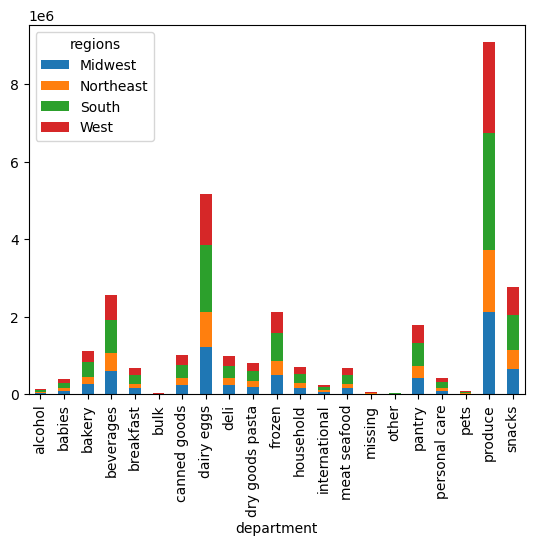

In [147]:
#Creating a Bar Chart for Dept_by_Region; 

Bar_Dept_by_Region = Dept_by_Region.plot(kind= 'bar', stacked = True)

In [148]:
#Exporting Bar Chart 'Bar_Dept_by_Region';

Bar_Dept_by_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department-by-Regions Bar.png'))

<b>C. Customers Household Size by Regions

In [151]:
#Analyzing Household Size by Regions;

House_Size_Regions = pd.crosstab(df_High_Actv_Cust['household_size'], df_High_Actv_Cust['regions'])

In [152]:
House_Size_Regions

regions,Midwest,Northeast,South,West
household_size,,,,
Big Family,1787286,1381233,2585864,2018133
Single Adults,1822816,1354482,2581933,1980450
Young Parent,1809994,1351961,2603717,1967589


In [153]:
#Copying Customer's 'Household Size' by Department to clipboard;

House_Size_Regions.to_clipboard()

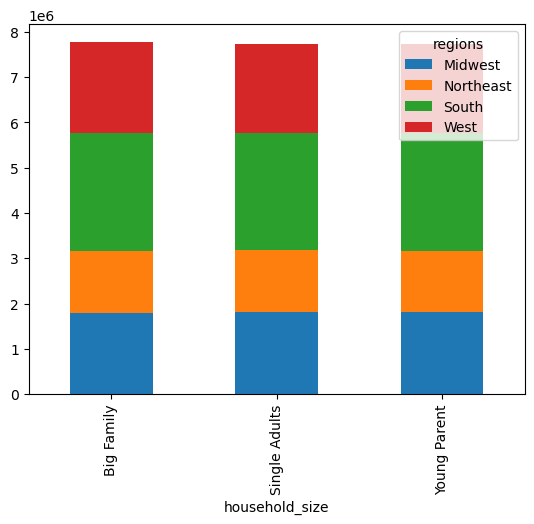

In [154]:
#Creating a Stacked Bar Chart for House_Size_Regions;

Bar_House_Size_Regions = House_Size_Regions.plot(kind= 'bar', stacked = True)

In [155]:
#Exporting Bar Chart 'Bar_Dept_by_Region';

Bar_House_Size_Regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'House-size Regions Bar.png'))

<b>D. Customers Household Size by Department

In [157]:
#Analyzing Household Size by Department; 

House_Size_Dept = pd.crosstab(df_High_Actv_Cust['department'], df_High_Actv_Cust['regions'])

In [159]:
House_Size_Dept

regions,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [160]:
#Copying Customer's 'Household Size' by Department to clipboard;

House_Size_Dept.to_clipboard()

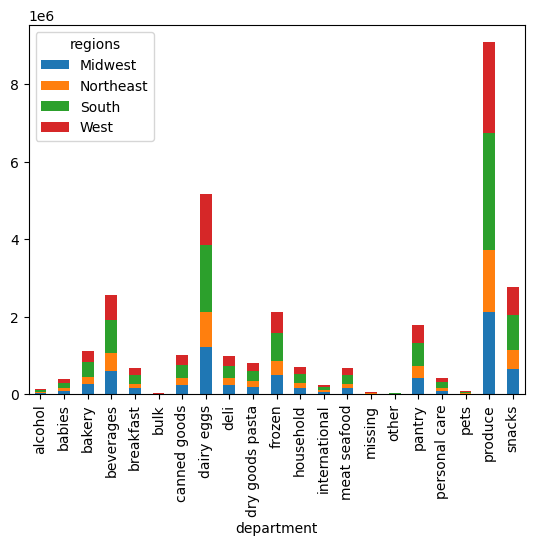

In [158]:
#Creating a Stacked Bar Chart for House_Size by Department;

Bar_House_Size_Dept = House_Size_Dept.plot(kind= 'bar', stacked = True)

<b>Produce Department leads across both regions followed by Dairy Eggs Department

In [161]:
#Exporting Bar Chart 'Bar_Dept_by_Region';

Bar_House_Size_Dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'House-Size by Department Bar.png'))